In [60]:
## Import các thư viện cần thiết
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [61]:
import pandas as pd

# Đọc dữ liệu huấn luyện và kiểm thử
train_data = pd.read_csv('../Lab4/Data/adult.data.csv')
test_data = pd.read_csv('../Lab4/Data/adult.test.csv')


In [62]:
# Xóa dòng có dữ liệu trống
train_data.replace('?', pd.NA).dropna(inplace=True)
test_data.replace('?', pd.NA).dropna(inplace=True)

# # Xóa cột 'fnlwgt' trong dữ liệu huấn luyện
train_data = train_data.drop('fnlwgt', axis=1)

train_data = train_data[~train_data.apply(lambda x: x.astype(str).str.contains(r'\?')).any(axis=1)]

test_data = test_data[~test_data.apply(lambda x: x.astype(str).str.contains(r'\?')).any(axis=1)]
# Đặt tên cột cho dữ liệu kiểm thử
test_data.columns = train_data.columns

# In số lượng dữ liệu huấn luyện và kiểm thử
print("Số lượng dữ liệu huấn luyện:", len(train_data))
print("Số lượng dữ liệu kiểm thử:", len(test_data))

# Nối dữ liệu huấn luyện và kiểm thử
data = pd.concat([train_data, test_data])

Số lượng dữ liệu huấn luyện: 30162
Số lượng dữ liệu kiểm thử: 15060


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [64]:
data.head(5)

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [65]:
data = data.replace('?', pd.NA).dropna()

In [66]:
df = data.select_dtypes(include='number')

<Axes: >

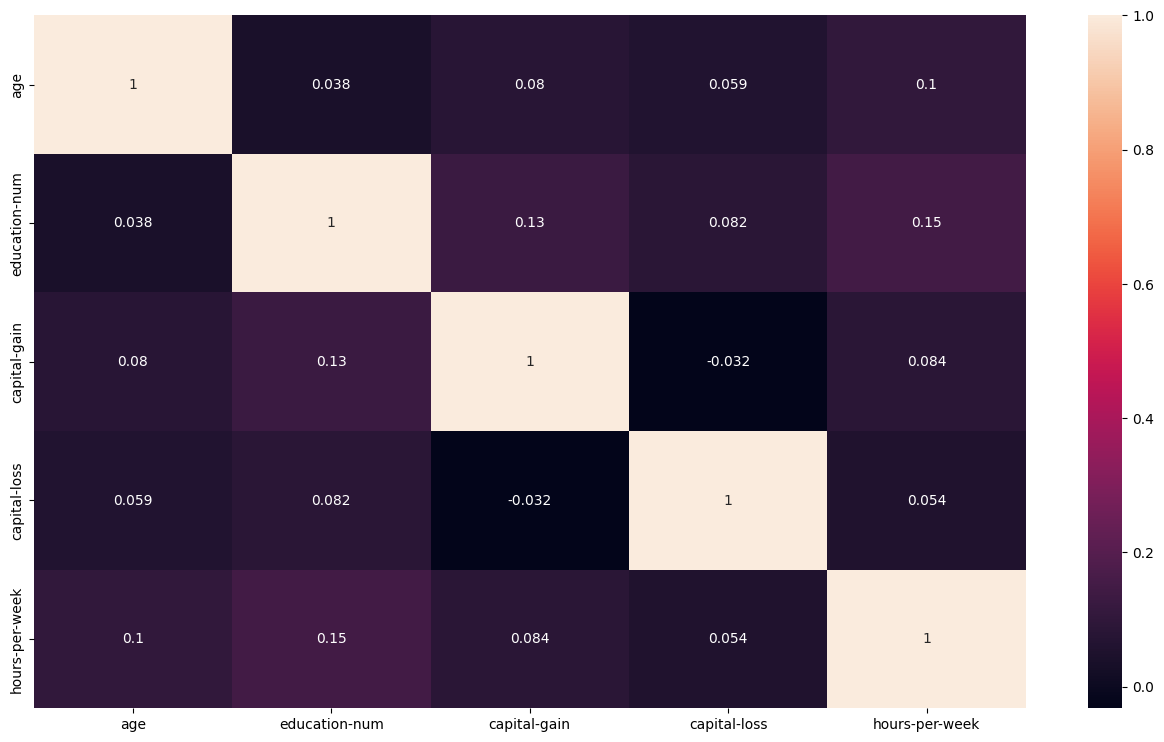

In [67]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [68]:
features = data.drop('income', axis =1)
labels = data['income']

In [69]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [70]:
features_onehot = pd.get_dummies(features, columns = features.select_dtypes(exclude=['int64']).columns)
features_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
16275   33             13             0             0              40   
16276   39             13             0             0              36   
16278   38             13             0             0              50   
16279   44             13          5455             0              40   
16280   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       False                 False               False   
1                       False                 False               False   
2                       False                 False                True   
3                       False                 False                True   
4                       False                 False                True   
...                       ...                   ...                 ...   
16275                   False                 False                True   
16276                   False                 False                True   
16278                   False                 False                True   
16279                   False                 False                True   
16280                   False                 False               False   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        False                        False  ...   
1                        False                         True  ...   
2                        False                        False  ...   
3                        False                        False  ...   
4                        False                        False  ...   
...                        ...                          ...  ...   
16275                    False                        False  ...   
16276                    False                        False  ...   
16278                    False                        False  ...   
16279                    False                        False  ...   
16280                     True                        False  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
16275                     False                        False   
16276                     False                        False   
16278                     False                        False   
16279                     False                        False   
16280                     False                        False   

       native-country_ Scotland  native-country_ South  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
16275                     False                  False   
16276                     False                  False   
16278                     False                  False   
16279                     False                  False   
16280

In [71]:
X_train = features_onehot[ :30162]
X_test = features_onehot[30162:]
Y_train = labels[:30162]
Y_test = labels[30162:]

In [72]:
clf = tree. DecisionTreeClassifier (criterion="entropy", random_state=0)
#Train Decision Tree Classifer clf. fit(X_train, y_train)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics. accuracy_score(Y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report:", metrics. classification_report (Y_test, tree_pred))

Accuracy:  0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



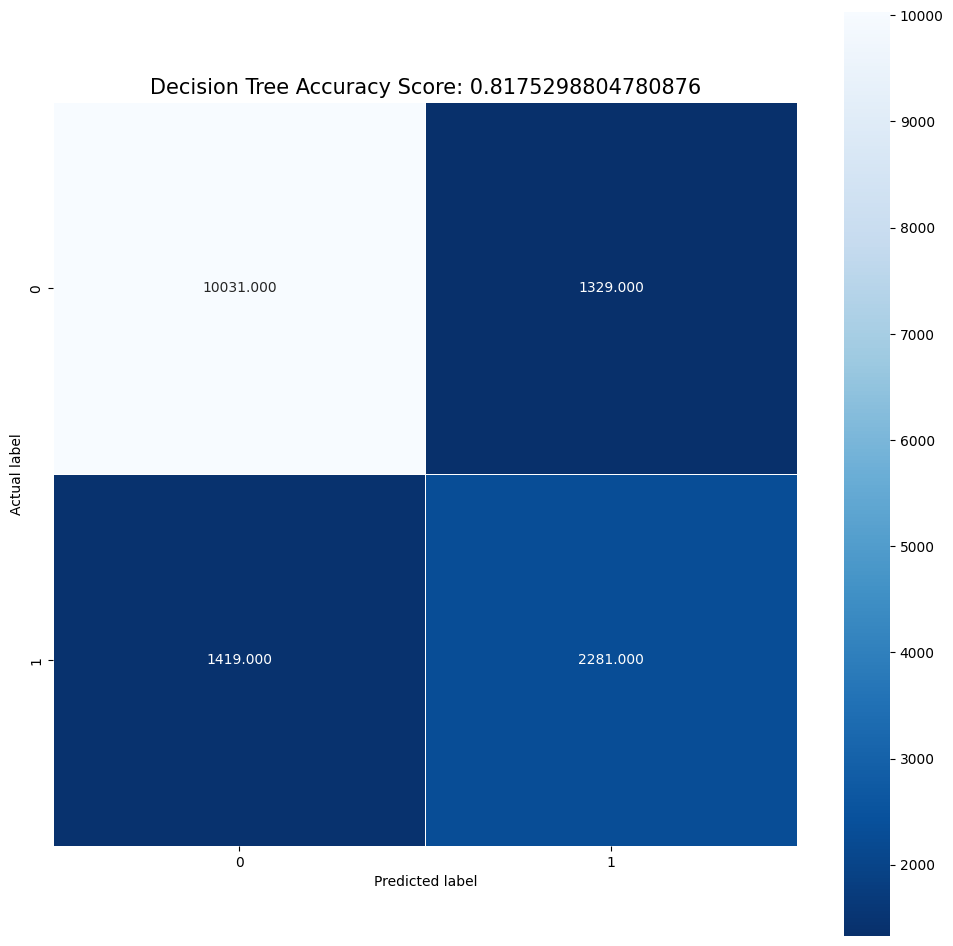

In [74]:
tree_cm = metrics.confusion_matrix(Y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt. ylabel('Actual label');
plt.xlabel ('Predicted label');
title = 'Decision Tree Accuracy Score: {0}' .format (tree_score)
plt. title (title, size = 15);

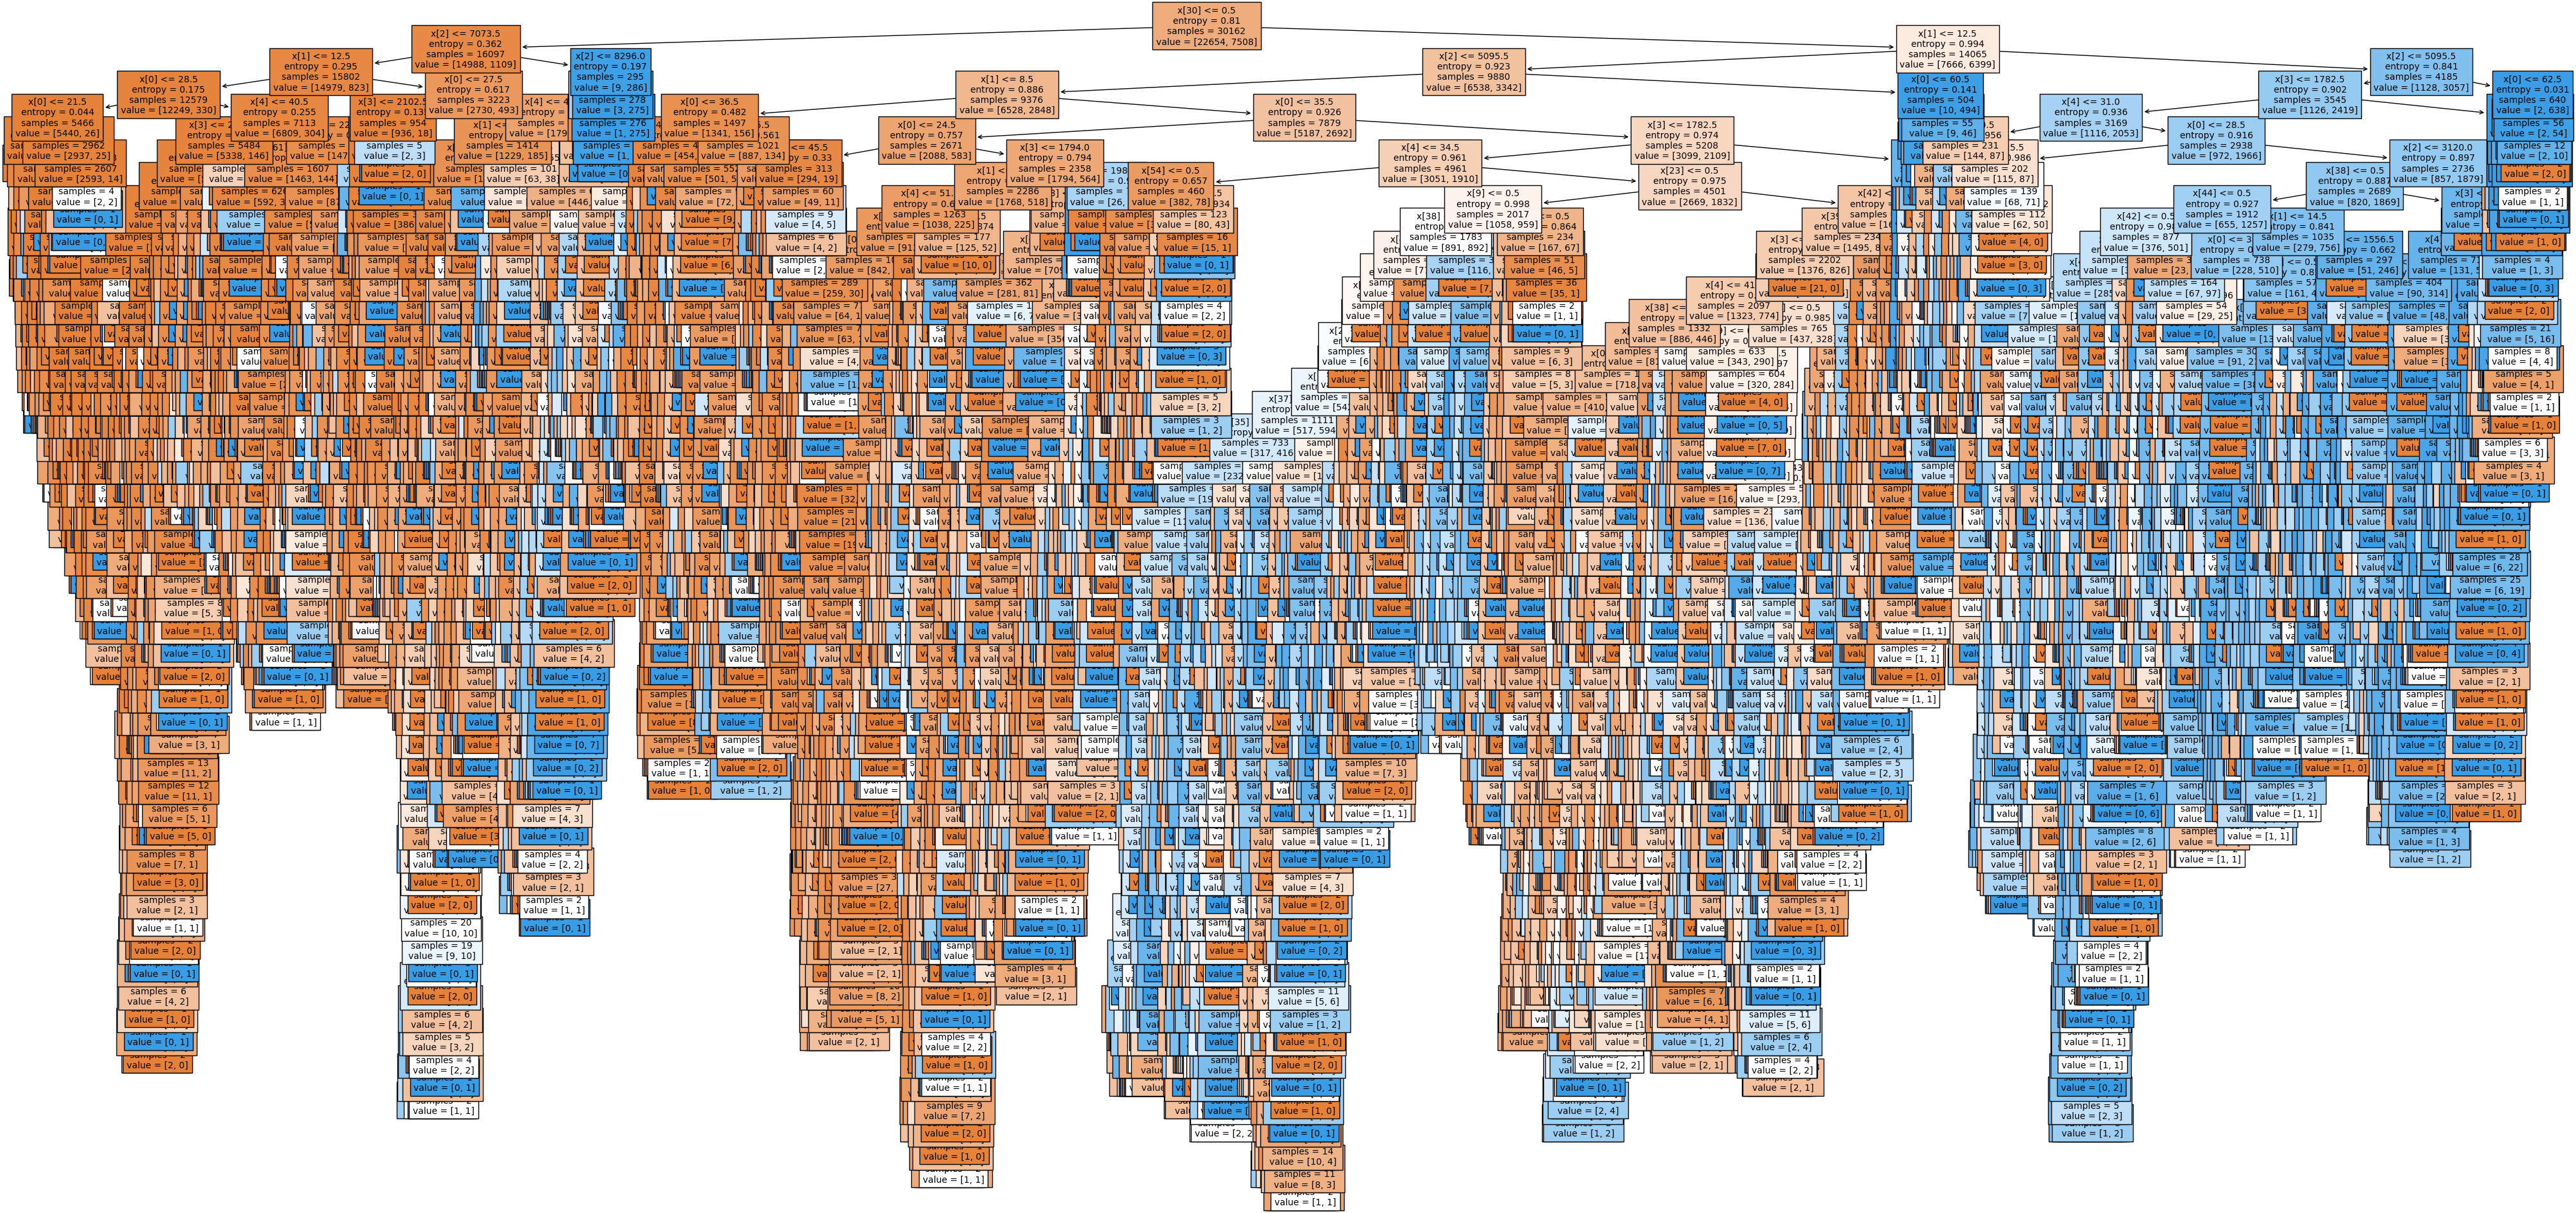

In [75]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig('decision_tree', dpi=100) 
plt.show()

In [76]:
clf = tree.DecisionTreeClassifier (criterion="gini", random_state=0)
#Train Decision Tree Classifer clf. fit(X_train, y_train)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [77]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics. accuracy_score(Y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report:", metrics. classification_report (Y_test, tree_pred))

Accuracy:  0.8122841965471448
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



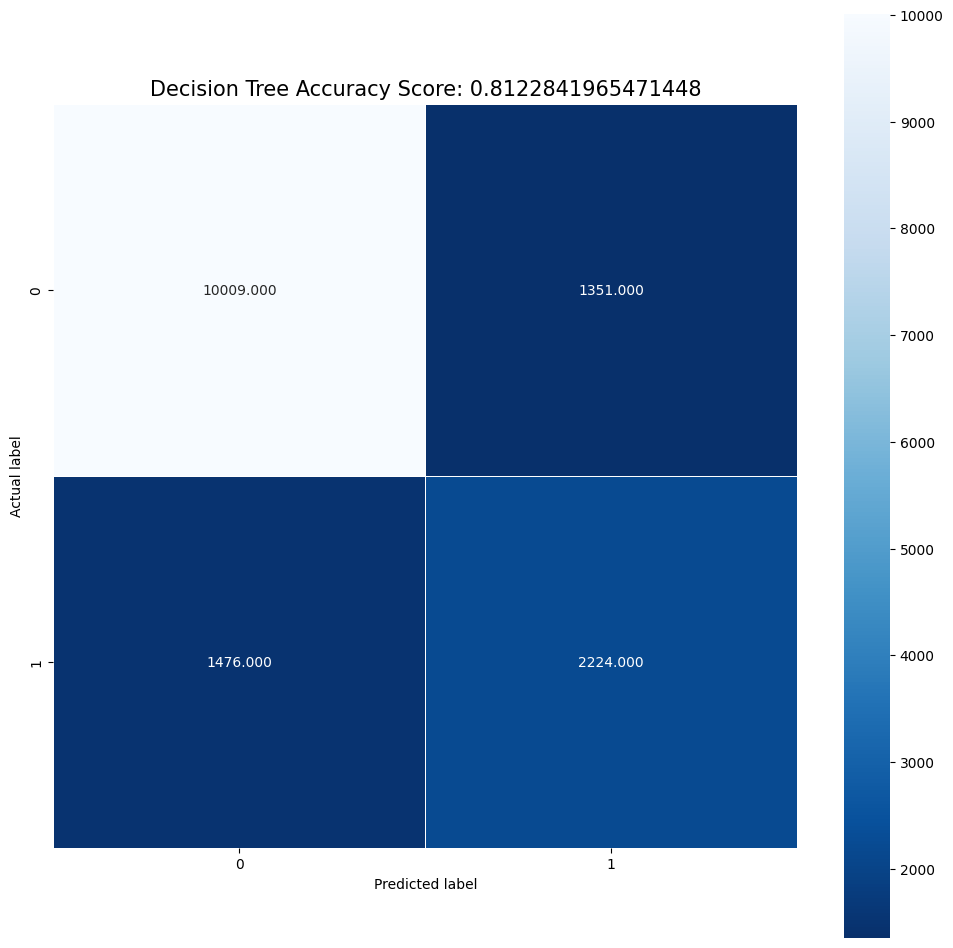

In [78]:
tree_cm = metrics.confusion_matrix(Y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt. ylabel('Actual label');
plt.xlabel ('Predicted label');
title = 'Decision Tree Accuracy Score: {0}' .format (tree_score)
plt. title (title, size = 15);

In [79]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, Y_train).predict(X_test)

In [80]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics. accuracy_score(Y_test, bayes_pred)
print ("Accuracy:", bayes_score) 
print ("Report:", metrics. classification_report(Y_test, bayes_pred))

Accuracy: 0.8029216467463479
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



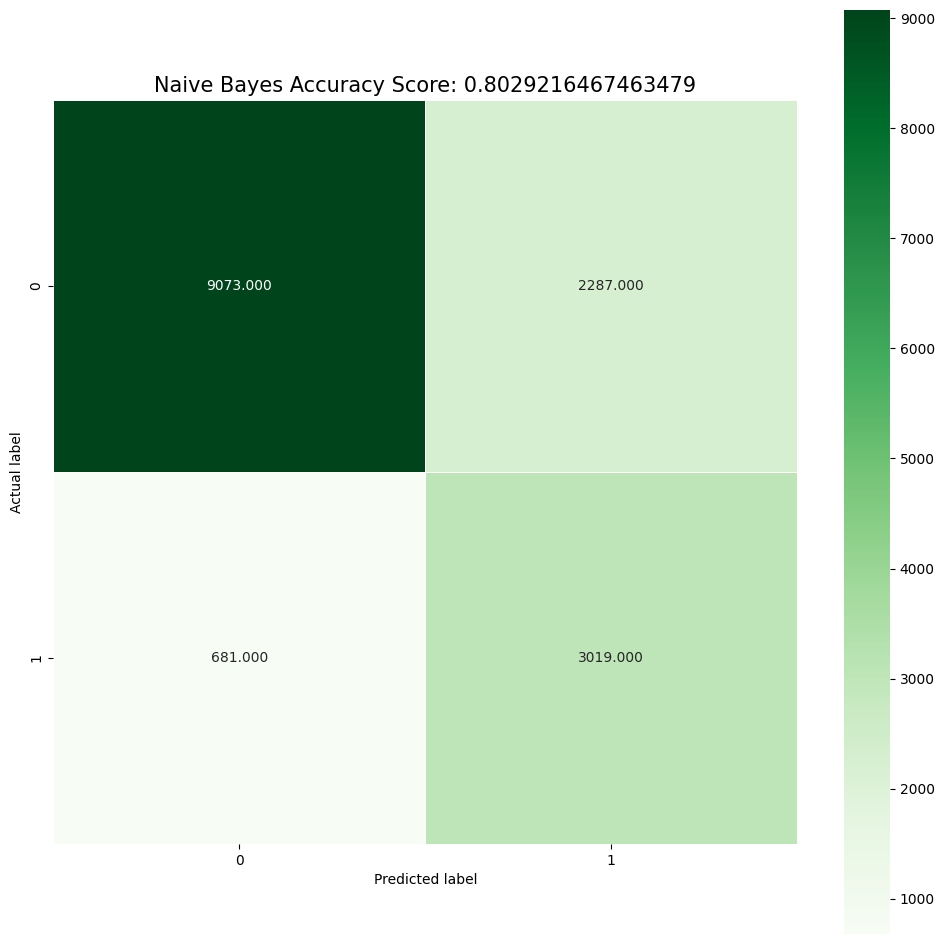

In [81]:
bayes_cm = metrics. confusion_matrix(Y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap (bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format (bayes_score)
plt.title(title, size = 15);